# Getting Started

## General Tips
In each homework problem, you will implement various autoencoder models and run them on two datasets (dataset 1 and dataset 2). The expected outputs for dataset 1 are already provided to help as a sanity check.

Feel free to print whatever output (e.g. debugging code, training code, etc) you want, as the graded submission will be the submitted pdf with images.

After you complete the assignment, download all of the image outputted in the results/ folder and upload them to the figure folder in the given latex template.

Run the cells below to download and load up the starter code. It may take longer to run since we are using larger datasets.

In [ ]:
# get to the parent dir of mai_dul repo
import os
os.chdir('../../')
os.getcwd()

In [ ]:
# install latest version deepul package
!pip install -e .

In [4]:
from deepul.hw2_helper import *

# Question 2: VAEs on Images [40pts]
In this question, you will train different VAE models on image datasets. Execute the cell below to visualize the two datasets ([SVHN](http://ufldl.stanford.edu/housenumbers/) and CIFAR10 (https://www.cs.toronto.edu/~kriz/cifar.html)).

In [ ]:
visualize_svhn()
visualize_cifar10()

## Part (a) VAE [20pts]
In this part, implement a standard VAE with the following characteristics:

*   16-dim latent variables $z$ with standard normal prior $p(z) = N(0,I)$
*   An approximate posterior $q_\theta(z|x) = N(z; \mu_\theta(x), \Sigma_\theta(x))$, where $\mu_\theta(x)$ is the mean vector, and $\Sigma_\theta(x)$ is a diagonal covariance matrix
*   A decoder $p(x|z) = N(x; \mu_\phi(z), I)$, where $\mu_\phi(z)$ is the mean vector. (We are not learning the covariance of the decoder)

You can play around with different architectures and try for better results, but the following encoder / decoder architecture below suffices (Note that image input is always $32\times 32$.
```
conv2d(in_channels, out_channels, kernel_size, stride, padding)
transpose_conv2d(in_channels, out_channels, kernel_size, stride, padding)
linear(in_dim, out_dim)

Encoder
    conv2d(3, 32, 3, 1, 1)
    relu()
    conv2d(32, 64, 3, 2, 1) # 16 x 16
    relu()
    conv2d(64, 128, 3, 2, 1) # 8 x 8
    relu()
    conv2d(128, 256, 3, 2, 1) # 4 x 4
    relu()
    flatten() # 16
    linear(4 * 4 * 256, 2 * latent_dim)

Decoder
    linear(latent_dim, 4 * 4 * 128)
    relu()
    reshape(4, 4, 128)
    transpose_conv2d(128, 128, 4, 2, 1) # 8 x 8
    relu()
    transpose_conv2d(128, 64, 4, 2, 1) # 16 x 16
    relu()
    transpose_conv2d(64, 32, 4, 2, 1) # 32 x 32
    relu()
    conv2d(32, 3, 3, 1, 1)
```

You may find the following training tips helpful
*   When computing reconstruction loss and KL loss, average over the batch dimension and **sum** over the feature dimension
*   When computing reconstruction loss, it suffices to just compute MSE between the reconstructed $x$ and true $x$
*   Use batch size 128, learning rate $10^{-3}$, and an Adam optimizer




**You will provide the following deliverables**


1.   Over the course of training, record the average full negative ELBO, reconstruction loss, and KL term of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves.
2.   Report the final test set performance of your final model
3. 100 samples from your trained VAE
4. 50 real-image / reconstruction pairs (for some $x$, encode and then decode)
5. 10 interpolations of 10 images from your trained VAE (100 images total)



### Solution
Fill out the function below and return the neccessary arguments. Feel free to create more cells if need be

In [7]:
def q2_a(train_data, test_data, dset_id):
    """
    train_data: torch dataset with (n_train, 3, 32, 32) color images as tensors with 256 values rescaled to [0, 1]
    test_data: torch dataset with (n_test, 3, 32, 32) color images as tensors with 256 values rescaled to [0, 1]
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
               used to set different hyperparameters for different datasets

    Returns
    - a (# of training iterations, 3) numpy array of full negative ELBO, reconstruction loss E[-p(x|z)],
      and KL term E[KL(q(z|x) | p(z))] evaluated every minibatch
    - a (# of epochs + 1, 3) numpy array of full negative ELBO, reconstruciton loss E[-p(x|z)],
      and KL term E[KL(q(z|x) | p(z))] evaluated once at initialization and after each epoch
    - a (100, 32, 32, 3) numpy array of 100 samples from your VAE with values in {0, ..., 255}
    - a (100, 32, 32, 3) numpy array of 50 real image / reconstruction pairs
      FROM THE TEST SET with values in {0, ..., 255}
    - a (100, 32, 32, 3) numpy array of 10 interpolations of length 10 between
      pairs of test images. The output should be those 100 images flattened into
      the specified shape with values in {0, ..., 255}
    """

    """ YOUR CODE HERE """


### Results
Once you've finished `q2_a`, execute the cells below to visualize and save your results.

Using downloaded and verified file: homeworks/hw2/data/train_32x32.mat
Using downloaded and verified file: homeworks/hw2/data/test_32x32.mat
Starting epoch 0, test loss is 799.8303855516168.


100%|██████████| 573/573 [00:09<00:00, 58.01it/s]


Starting epoch 1, test loss is 44.35932746751219.


100%|██████████| 573/573 [00:09<00:00, 58.70it/s]


Starting epoch 2, test loss is 40.03537219891024.


100%|██████████| 573/573 [00:09<00:00, 59.11it/s]


Starting epoch 3, test loss is 38.3728709745495.


100%|██████████| 573/573 [00:09<00:00, 60.92it/s]


Starting epoch 4, test loss is 38.01553306274789.


100%|██████████| 573/573 [00:09<00:00, 61.89it/s]


Starting epoch 5, test loss is 38.14051089201812.


100%|██████████| 573/573 [00:09<00:00, 60.87it/s]


Starting epoch 6, test loss is 37.62918023529709.


100%|██████████| 573/573 [00:09<00:00, 61.70it/s]


Starting epoch 7, test loss is 37.69789026936799.


100%|██████████| 573/573 [00:09<00:00, 61.97it/s]


Starting epoch 8, test loss is 36.93605728712123.


100%|██████████| 573/573 [00:09<00:00, 60.83it/s]


Starting epoch 9, test loss is 36.87232253503125.


100%|██████████| 573/573 [00:09<00:00, 61.88it/s]


Starting epoch 10, test loss is 36.7272165294945.


100%|██████████| 573/573 [00:09<00:00, 61.28it/s]


Starting epoch 11, test loss is 36.76488321136681.


100%|██████████| 573/573 [00:09<00:00, 60.94it/s]


Starting epoch 12, test loss is 36.92788565693711.


100%|██████████| 573/573 [00:09<00:00, 61.98it/s]


Starting epoch 13, test loss is 36.41847857362153.


100%|██████████| 573/573 [00:09<00:00, 61.02it/s]


Starting epoch 14, test loss is 36.781411028523785.


100%|██████████| 573/573 [00:09<00:00, 61.57it/s]


Starting epoch 15, test loss is 36.623308185279626.


100%|██████████| 573/573 [00:09<00:00, 61.80it/s]


Starting epoch 16, test loss is 36.34091943366878.


100%|██████████| 573/573 [00:09<00:00, 60.71it/s]


Starting epoch 17, test loss is 36.21108145968783.


100%|██████████| 573/573 [00:09<00:00, 62.02it/s]


Starting epoch 18, test loss is 36.41213241323929.


100%|██████████| 573/573 [00:09<00:00, 62.05it/s]


Starting epoch 19, test loss is 36.27786729433966.


100%|██████████| 573/573 [00:09<00:00, 61.22it/s]


Final -ELBO: 36.6436, Recon Loss: 24.4105, KL Loss: 12.2331


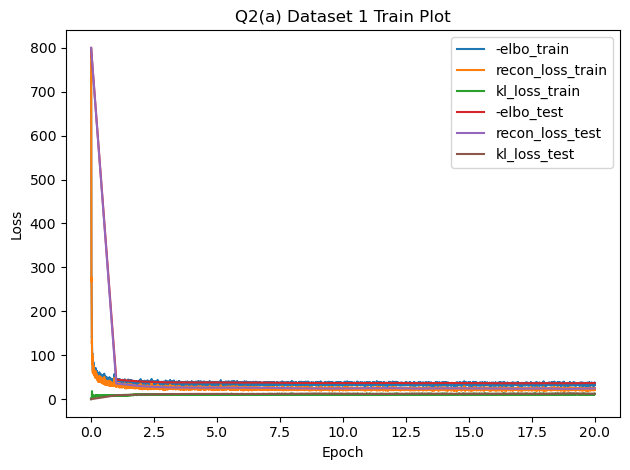

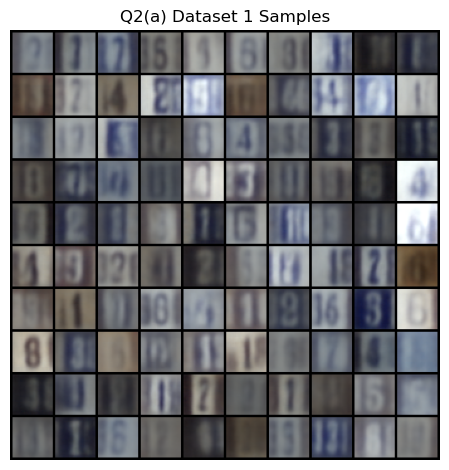

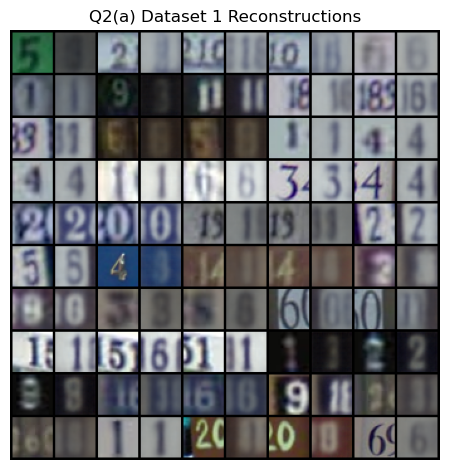

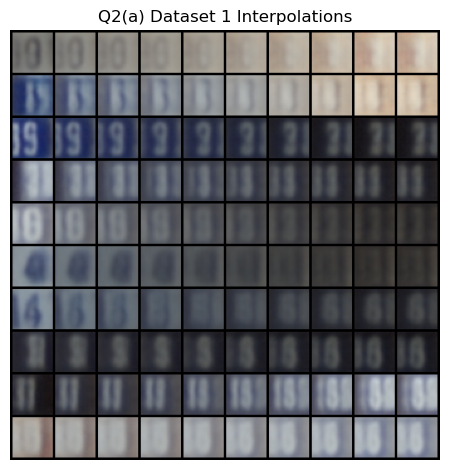

In [8]:
q2_save_results('a', 1, q2_a)

In [ ]:
q2_save_results('a', 2, q2_a)